In [2]:
# Descriptive analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("training.csv")

# summary

data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


### Columns

In [4]:
data.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

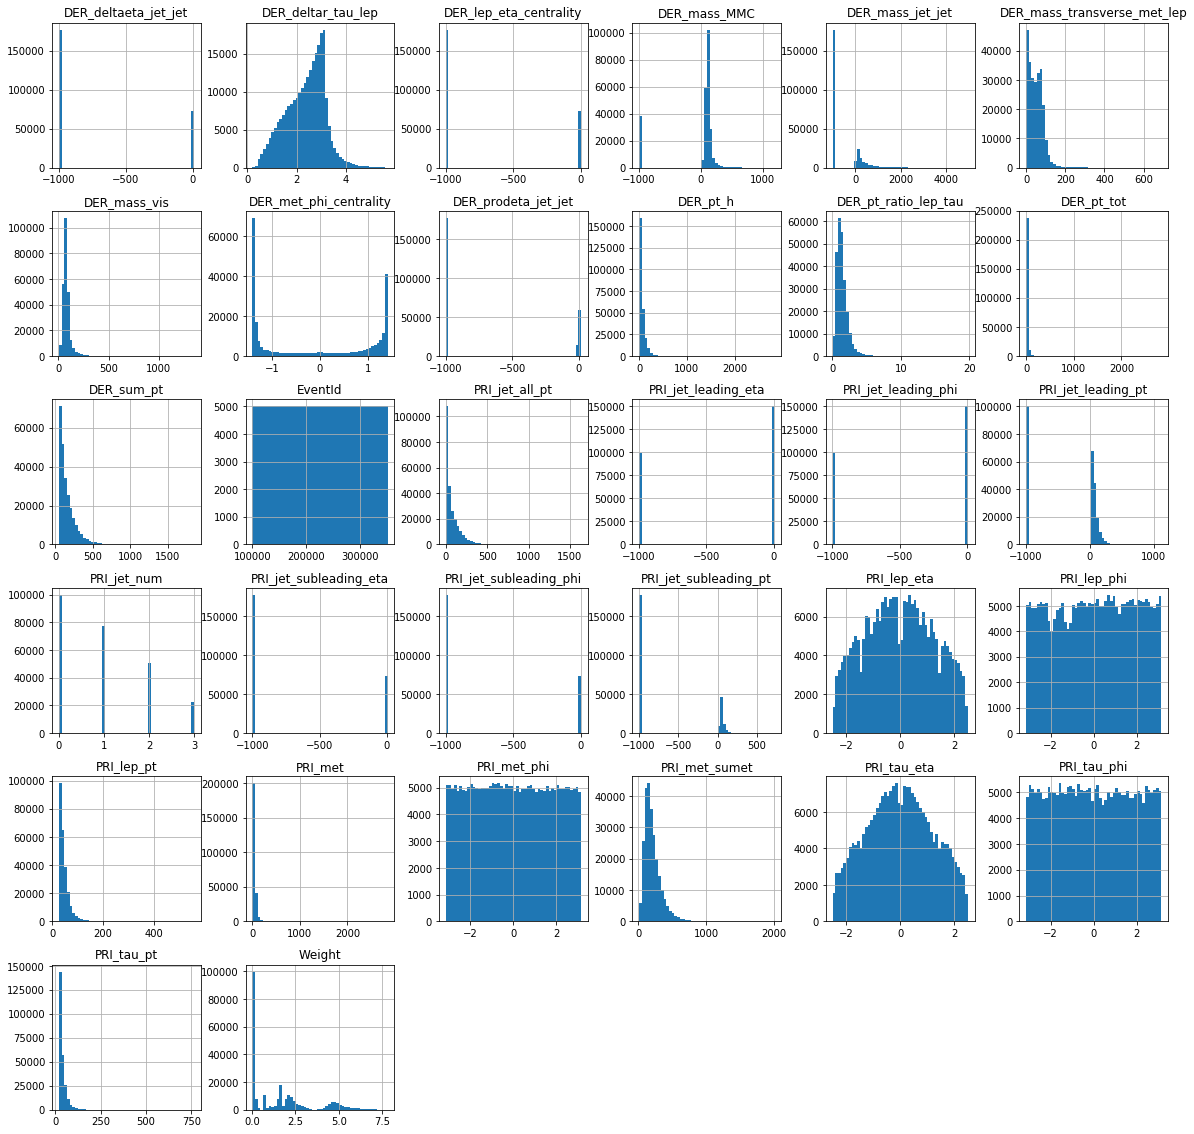

In [2]:
data.hist(bins=50,
            figsize=(20,20))

plt.show()

In [8]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [9]:
# check if there are any NaN's in the data set
print(data.isnull().values.any())

False


In [3]:
# so that the python packages who are installed in miniconda3 are see
import sys
sys.path.append("/Users/adrianahne/miniconda3/envs/dataScienceEnv/lib/python3.5/site-packages")

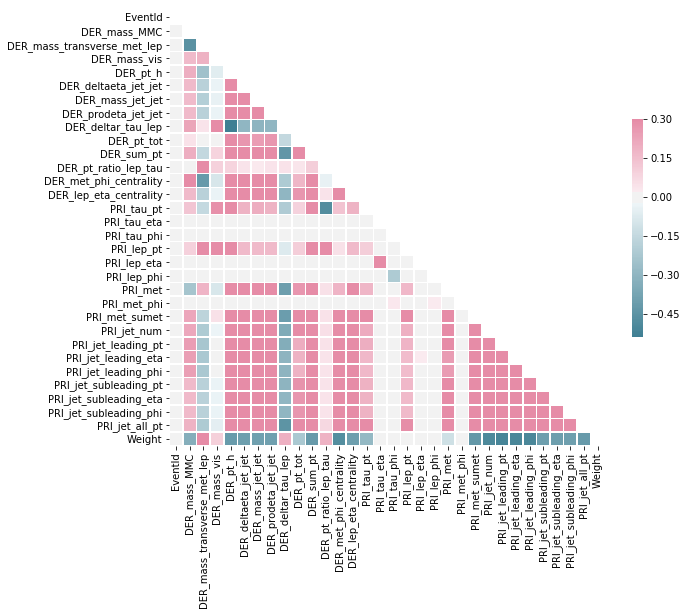

In [6]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


anova_filter = SelectKBest(f_regression, k=5)

model = LogisticRegression(C=1e5)
#model = LinearDiscriminantAnalysis()    
#model = GaussianNB()

pipeline = Pipeline([
    # for example feature selection
    ('select_features', anova_filter),
    ('model', model)
])


cv = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
confusion_mat = []

# choose only certain columns/feature
# use maybe >>> from sklearn.feature_selection import SelectKBest
X = data.filter(['Weight', 'PRI_jet_all_pt', 'PRI_jet_subleading_phi',
                 'PRI_jet_leading_phi', 'PRI_met', 
                 'DER_deltar_tau_lep', 'DER_met_phi_centrality'], axis=1)
y = data.Label
X


,Weight,PRI_jet_all_pt,PRI_jet_subleading_phi,PRI_jet_leading_phi,PRI_met,DER_deltar_tau_lep,DER_met_phi_centrality
0,0.002653,113.497,-2.475,0.444,16.824,3.064,1.396
1,2.233584,46.226,-999.000,1.158,44.704,3.473,1.414
2,2.347389,44.251,-999.000,-2.028,54.283,3.148,1.414
3,5.446378,-0.000,-999.000,-999.000,31.082,3.310,-1.285
4,6.245333,0.000,-999.000,-999.000,2.723,3.891,-1.385
5,0.083414,193.660,3.106,-0.653,40.735,1.362,0.479
6,0.002653,179.877,-2.767,1.450,38.421,2.941,1.393
7,0.018636,30.638,-999.000,-1.724,22.275,2.897,-1.305
8,5.296003,0.000,-999.000,-999.000,37.791,2.904,-1.366
9,0.001502,167.735,-999.000,-2.514,132.678,1.609,0.538


In [10]:
for train, test in cv.split(X,y):
    
    # Train the pipeline
    pipeline.fit(X[train], y[train])
    
    # Predict
    y_pred = pipeline.predict(X[test])
    
    # Calculate model performance 
    accuracy = accuracy_score(y[test], y_pred)
    accuracies.append(accuracy)
    print('accuracy for this fold {:.2f}%'.format(accuracy*100))
    
    # calculate confusion matrix
    cm = confusion_matrix(y[test], y_pred)
    cm = 100 * cm / cm.sum(axis=1)[:, np.newaxis]
    confusion_mat.append(cm)
    

accuracies = np.asarray(accuracies) * 100
print('CV Accuracy: {:.2f}% +/- {:.2f}%'.format(accuracies.mean(), accuracies.std()))
print('Confusion matrix (mean):')

confusion_mat = np.asarray(confusion_mat)

np.mean(confusion_mat, axis=0)


KeyError: '[     1      2      3 ..., 249996 249997 249999] not in index'